# Descriptive analysis of eqd2_total_dose values categorised by tumour stage

In this notebook, we're analysing values of eqd2_total_dose of the research group. First, we will generate descriptive statistics of eqd2_total_dose values and visualise it. Then, we will categorise the eqd2_total_dose data by tumour stages 2B and 3B's and create subgroups. We will analyse and compare the subgroups by their descriptive statistics.


In [1]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.stats.api as sms

In [2]:
# Importing data
df = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\processed\research_group.csv")

In [3]:
# Selecting variables eqd2_total_dose and patient id
eqd2_total_dose = df[['id', 'eqd2_total_dose']]

In [4]:
# Selecting eqd2_total_dose values of patients having 2B stage tumour
eqd2_2B_total_dose = df.loc[df['T'] == '2B'][['id', 'eqd2_total_dose']]

In [5]:
# Selecting eqd2_total_dose values of patients having 3B stage tumour
eqd2_3B_total_dose = df.loc[df['T'] == '3B'][['id', 'eqd2_total_dose']]

## Descriptive statistics of eqd2_total_dose
The values of eqd2_total_dose has the following statistics.

In [6]:
print("Descriptive statistics")
eqd2_total_dose.describe()

Descriptive statistics


,id,eqd2_total_dose
count,44.000000,44.000000
mean,147.045455,85.613636
std,21.743702,2.034424
min,104.000000,80.700000
25%,131.750000,84.450000
50%,147.500000,85.800000
75%,164.500000,86.400000
max,184.000000,89.900000


<AxesSubplot:xlabel='eqd2_total_dose', ylabel='Count'>

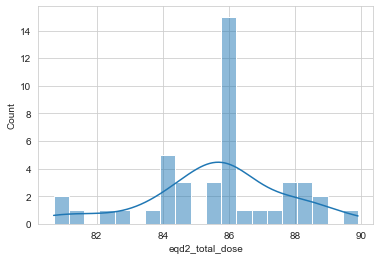

In [7]:
sns.histplot(eqd2_total_dose['eqd2_total_dose'], bins=20, kde=True)

In [8]:
print("95% confidence interval for the population mean value")
data = eqd2_total_dose['eqd2_total_dose']
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

95% confidence interval for the population mean value


(84.99511504953715, 86.2321576777356)

## Descriptive statistics of eqd2_total_dose of patients with 2B tumour stage

In [9]:
print("Descriptive statistics of eqd2_total_dose values of patients at 2B stage")
eqd2_2B_total_dose.describe()

Descriptive statistics of eqd2_total_dose values of patients at 2B stage


,id,eqd2_total_dose
count,23.000000,23.000000
mean,153.391304,85.565217
std,22.610816,2.025656
min,104.000000,80.700000
25%,141.000000,84.300000
50%,155.000000,85.800000
75%,172.500000,86.100000
max,184.000000,89.900000


<AxesSubplot:xlabel='eqd2_total_dose', ylabel='Count'>

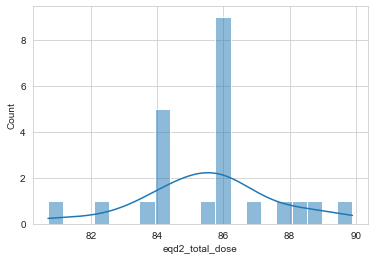

In [10]:
sns.histplot(eqd2_2B_total_dose['eqd2_total_dose'], bins=20, kde=True)

In [11]:
print("95% confidence interval for the population mean value")
data = eqd2_2B_total_dose['eqd2_total_dose']
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

95% confidence interval for the population mean value


(84.68925822033748, 86.44117656227121)

## Descriptive statistics of eqd2_total_dose of patients with 3B tumour stage

In [12]:
print("Descriptive statistics of eqd2_total_dose values of patients at 3B stage")
eqd2_3B_total_dose.describe()

Descriptive statistics of eqd2_total_dose values of patients at 3B stage


,id,eqd2_total_dose
count,16.000000,16.000000
mean,141.687500,85.543750
std,20.777291,2.260374
min,109.000000,80.900000
25%,127.750000,85.425000
50%,137.500000,85.800000
75%,158.250000,86.650000
max,179.000000,88.900000


<AxesSubplot:xlabel='eqd2_total_dose', ylabel='Count'>

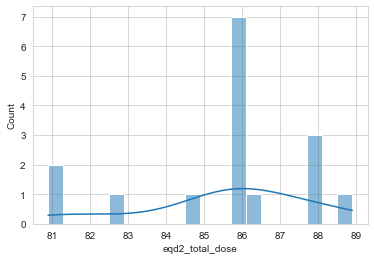

In [13]:
sns.histplot(eqd2_3B_total_dose['eqd2_total_dose'], bins=20, kde=True)

In [14]:
print("95% confidence interval for the population mean value")
data = eqd2_3B_total_dose['eqd2_total_dose']
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

95% confidence interval for the population mean value


(84.33928159284085, 86.74821840715916)

<AxesSubplot:xlabel='eqd2_total_dose', ylabel='Count'>

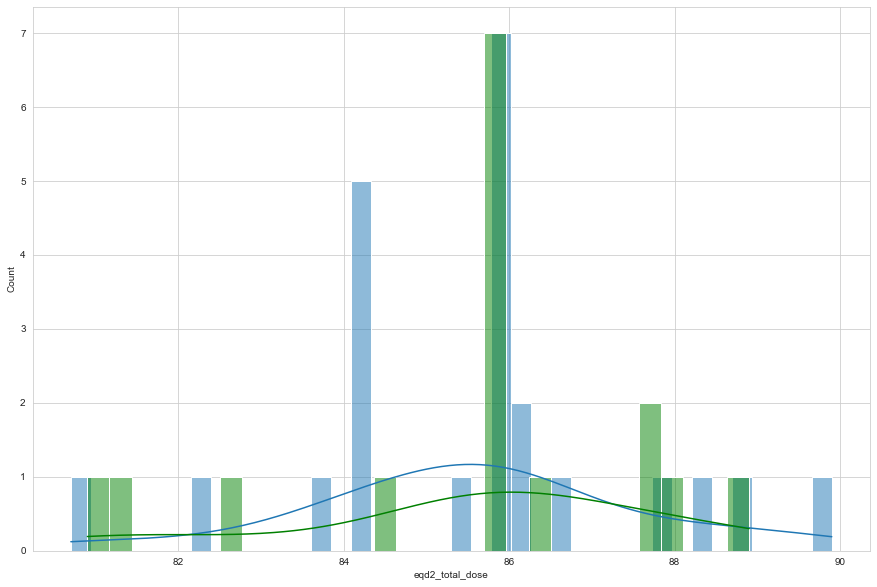

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(eqd2_2B_total_dose['eqd2_total_dose'], bins=38, kde=True)
sns.histplot(eqd2_3B_total_dose['eqd2_total_dose'], color='green', bins=30, kde=True)


---
## Comparative analysis of eqd2_total_dose values for 2B and 3B tumour stages.

In [16]:
# Two sample T-test for population mean equality
alpha = 0.05
statistic,p_value = stats.ttest_ind(eqd2_3B_total_dose['eqd2_total_dose'], eqd2_2B_total_dose['eqd2_total_dose'], equal_var=True)
print ("Testing values of eqd2_2B_total_dose and eqd2_3B_total_dose if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The two population means are not equal."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of eqd2_2B_total_dose and eqd2_3B_total_dose if the two population means are equal.
The test statistic is: -0.031047636620141286. The p_value is: 0.9753984262761872.
H0 = The two population means are equal.
HA = The two population means are not equal.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


In [17]:
#Testing for normality
alpha = 0.05
statistic,p_value = shapiro(eqd2_3B_total_dose['eqd2_total_dose'])
print ("Testing values of eqd2_3B_total_dose for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of eqd2_3B_total_dose for normality using the Shapiro-Wilk test.
The test statistic is: 0.8838106989860535. The p_value is: 0.0445062592625618.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


In [23]:
#Testing for normality
alpha = 0.05
statistic,p_value = shapiro(eqd2_2B_total_dose['eqd2_total_dose'])
print ("Testing values of eqd2_2B_total_dose for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of eqd2_2B_total_dose for normality using the Shapiro-Wilk test.
The test statistic is: 0.9462271928787231. The p_value is: 0.24395516514778137.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


---
The results of the paired t-test show that we have sufficient evidence to say that the mean values of two groups are different. '
Now, we perform one-tailed version of the paired t-test to test whether values of hrctv_3B_volume are less than the values of hrctv_2B_volume.

In [19]:
alpha = 0.05
statistic,p_value = stats.ttest_ind(eqd2_3B_total_dose['eqd2_total_dose'], eqd2_2B_total_dose['eqd2_total_dose'], alternative='less')
print ("Testing values of eqd2_3B_total_dose and hrctv_-B_volume if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The population mean of eqd2_3B_total_dose is less than eqd2_2B_total_dose."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of eqd2_3B_total_dose and hrctv_-B_volume if the two population means are equal.
The test statistic is: -0.031047636620141286. The p_value is: 0.4876992131380936.
H0 = The two population means are equal.
HA = The population mean of eqd2_3B_total_dose is less than eqd2_2B_total_dose.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


---
Finding 95 percent confidence interval for the difference of means of hrctv_2B_volume and hrctv_3B_volume

In [20]:
cm = sms.CompareMeans(sms.DescrStatsW(eqd2_3B_total_dose['eqd2_total_dose']), sms.DescrStatsW(eqd2_2B_total_dose['eqd2_total_dose']))
print (cm.tconfint_diff(usevar='pooled'))

(-1.4224457328743219, 1.3795109502656393)


In [21]:
mean_diff = eqd2_3B_total_dose['eqd2_total_dose'].mean() - eqd2_2B_total_dose['eqd2_total_dose'].mean()
print(mean_diff)

-0.021467391304341277


In [22]:
cm.summary()




,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0215,0.691,-0.031,0.975,-1.422,1.380
